# Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

In [2]:
# Analysis Steps
# 1. Importing and Understanding the Data
# 2. Cleaning Data
# 3. EDA
# 4. Data Preparation
# 5. Model Building
# 6. Residual Analysis
# 7. Making Predictions using model
# 8. Model Evalua`ation

### Step 1: Importing and Understanding Data

In [4]:
#importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import missingno as msmo

In [5]:
#Setting display options
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",100)
#pd.set_option('display.width', None)

In [6]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [7]:
#importing data 
#telecom_data = pd.read_csv('train.csv')

telecom_data = pd.read_csv("train.csv", sep=",", encoding="ISO-8859-1", header=0)
telecom_data_unseen = pd.read_csv('test.csv')
data_dict = pd.read_csv('data_dictionary.csv')
sample = pd.read_csv('sample.csv')

# Use below if running on kaggle
#telecom_data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/train.csv")
#telecom_data_unseen = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/test.csv")
#data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/data_dictionary.csv")
#sample = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c-66/sample.csv")

In [8]:
#checking shape of data to be used for training
telecom_data.shape

(69999, 172)

In [9]:
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [10]:
#Creating List of with column names from data 
#len(sorted(list(telecom_data.columns)))
col= sorted(list(telecom_data.columns))
#col

In [11]:
# Check Info

In [12]:
#Describe data

In [13]:
#Check missing values in columns

In [14]:
# remove columns with >40%

In [15]:
#groupping columns based on acronumys from data dictionaries to get there meaning
ids = ['id','circle_id']
local_outgoing = [i for i in list(telecom_data.columns) if re.search('loc.+og.+mou',i)]
local_incoming = [i for i in list(telecom_data.columns) if re.search('loc.+ic.+mou',i)]
std_outgoing =  [i for i in list(telecom_data.columns) if re.search('std.+og.+mou',i)]
std_incoming =  [i for i in list(telecom_data.columns) if re.search('std.+ic.+mou',i)]
roaming_outgoing = [i for i in list(telecom_data.columns) if re.search('roam.+og.+mou',i)]
roaming_incoming = [i for i in list(telecom_data.columns) if re.search('roam.+ic.+mou',i)]
total_outgoing_minutes = [i for i in list(telecom_data.columns) if re.search('total.+og.+mou',i)]
total_incoming_minutes = [i for i in list(telecom_data.columns) if re.search('total.+ic.+mou',i)]
offnetwork_minutes = [i for i in list(telecom_data.columns) if re.search('offnet',i)]
onnetwork_minutes = [i for i in list(telecom_data.columns) if re.search('onnet',i)]
total_recharge = [i for i in list(telecom_data.columns) if re.search('total_rech.+',i)]
#total_amounts = [i for i in list(telecom_data.columns) if re.search('total.+amt',i)]

average_revenue_3g = [i for i in list(telecom_data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(telecom_data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(telecom_data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(telecom_data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(telecom_data.columns) if re.search('aon',i)]
count_of_recharge = [i for i in list(telecom_data.columns) if re.search('count.+',i)]
date_of_recharge = [i for i in list(telecom_data.columns) if re.search('^date.+',i)]
isd_calls = [i for i in list(telecom_data.columns) if re.search('isd.+',i)]
special_calls = [i for i in list(telecom_data.columns) if re.search('spl.+',i)]
max_recharge = [i for i in list(telecom_data.columns) if re.search('max.+',i)]
monthly_recharge = [i for i in list(telecom_data.columns) if re.search('monthly.+',i)]
sachet_recharge = [i for i in list(telecom_data.columns) if re.search('sachet_.+',i)]
others_recharge = [i for i in list(telecom_data.columns) if re.search('.+others',i)]
fb_night_pack = ['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']
avg_recharge_data = [i for i in list(telecom_data.columns) if re.search('av.+',i)]
average_revenue = ['arpu_6','arpu_7','arpu_8',]
voice_based_cost = [i for i in list(telecom_data.columns) if re.search('vbc.+',i)]
Last_day_rech = [i for i in list(telecom_data.columns) if re.search('last_day.+',i)]
Last_date_Month = [i for i in list(telecom_data.columns) if re.search('last_date.+',i)]


var = [*ids,*local_incoming,*local_outgoing,*std_incoming,*std_outgoing,*roaming_outgoing,*roaming_incoming,*total_outgoing_minutes,*total_incoming_minutes
      ,*offnetwork_minutes,*onnetwork_minutes,*total_recharge,*average_revenue_3g,*average_revenue_2g,*volume_3g,*volume_2g,*age_on_network,*count_of_recharge
      ,*date_of_recharge,*isd_calls,*special_calls,*max_recharge,*monthly_recharge,*sachet_recharge,*others_recharge,*fb_night_pack,*avg_recharge_data
      ,*average_revenue,*voice_based_cost,*Last_day_rech,*Last_date_Month,'churn_probability']
len(var)

172

In [16]:
c = [val for val in col if val not in var]
#c = [val for val in a if val not in b]
c

[]

In [17]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [18]:
round((telecom_data.isnull().sum() / len(telecom_data))*100,2)

id                   0.0
circle_id            0.0
loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 172, dtype: float64

In [19]:
telecom_data.isnull().sum() / telecom_data.shape[0]*100 <=70

id                   True
circle_id            True
loc_og_t2o_mou       True
std_og_t2o_mou       True
loc_ic_t2o_mou       True
                     ... 
aon                  True
aug_vbc_3g           True
jul_vbc_3g           True
jun_vbc_3g           True
churn_probability    True
Length: 172, dtype: bool

In [20]:
telecom_data = telecom_data.loc[:,telecom_data.isnull().sum() / telecom_data.shape[0]*100 <=70]

In [21]:
telecom_data

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,0,0,0,1,0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,0,0,0,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,0,0,0,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,1,1,0,0,0,277,664.25,1402.96,990.97,0


In [22]:
#telecom_data[var]

In [23]:
telecom_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [24]:
round((telecom_data.isnull().sum() / len(telecom_data))*100,2)

id                   0.0
circle_id            0.0
loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 142, dtype: float64

In [25]:
telecom_data[telecom_data.duplicated() ==True]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


<Axes: >

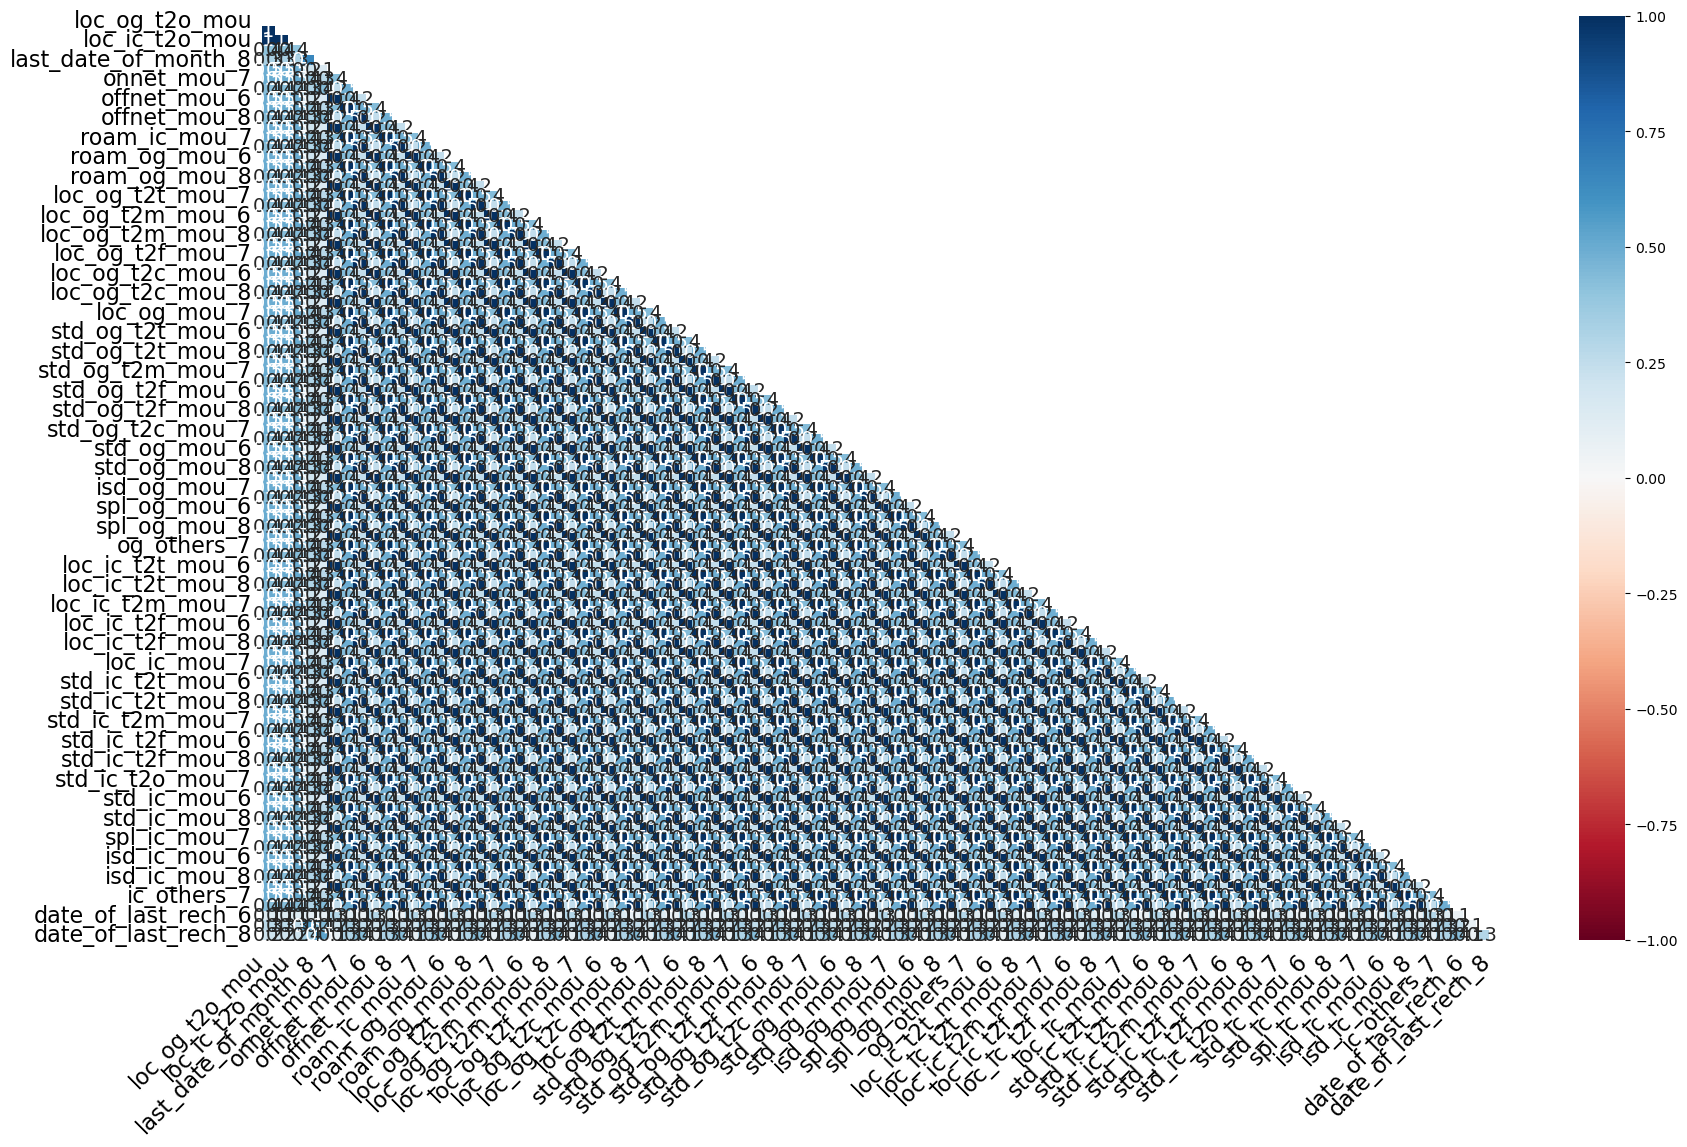

In [26]:
msmo.heatmap(telecom_data)